# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Ali Essonni*
* *Enrico Benedettini*
* *Youssef Amine*
* *Mak Fazlic*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [29]:
import epidemics_helper
import networkx as nx
from networkx.readwrite import json_graph
import json
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.connectivity import EdgeComponentAuxGraph

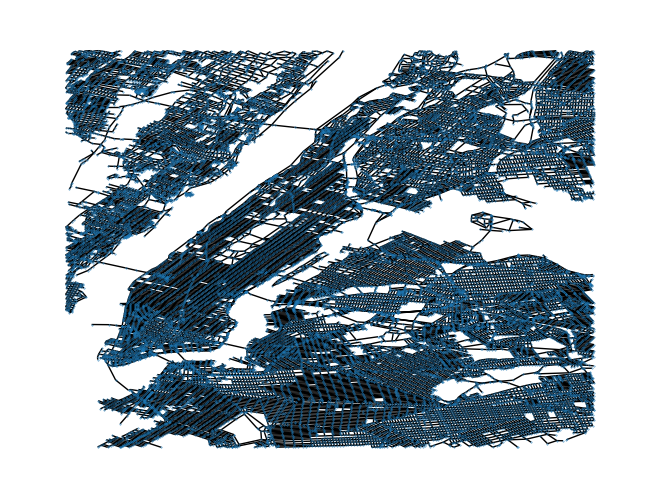

In [20]:
# Simulating an epidemic with the following parameters
# start node = 23654
# beta = 10
# gamma = 0.1

# First importing the json data and creating a graph from it
G = nx.Graph()
data = {}
with open('../data/nyc_augmented_network.json') as json_file:
    data = json.load(json_file)
edges = data['links']

# transorm edges to list of tuples
edges = [(edge['source'], edge['target']) for edge in edges]
G.add_edges_from(edges)
coord = data['nodes']
# get second value of each tuple from coord
coord = [c['coordinates'] for c in coord]
# draw G with coordinates coord
nx.draw(G, pos=coord, with_labels=False, node_size=0.1)
plt.show()

In [3]:
# instantiating an sir model
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100)

Epidemic stopped after 107.28 days | 107.28 days elapsed | 0.1% susceptible, 0.0% infected, 99.8% recovered


recovered:  91.61663079188853
infected:  8.243646387976284
suceptible:  0.13972282013519127


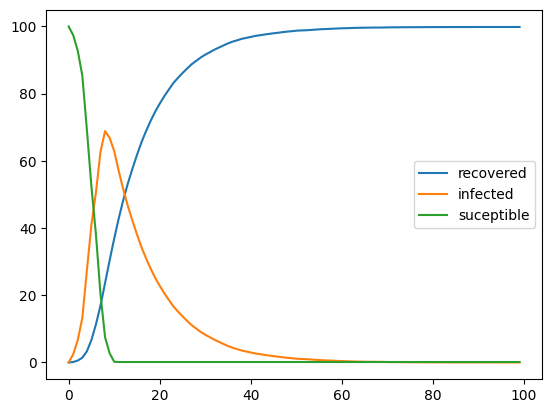

In [4]:
# infection_times is a numpy array of the time of infection of each node (the node id is the index)
# recover_times is a numpy array of the time of recovery of each node (the node id is the index)
infection_times = sir.inf_time
recover_times = sir.rec_time

# count the number of recovered nodes at each time step
recovered = np.zeros(100)
infected = np.zeros(100)
suceptible = np.zeros(100)
for i in range(100):
    recovered[i] = np.count_nonzero(recover_times <= i)
    infected[i] = np.count_nonzero(infection_times <= i) - recovered[i]
    suceptible[i] = len(G.nodes()) - infected[i] - recovered[i]

# print the number of recovered, infected and suceptible nodes at day 30
print("recovered: ", (recovered[30]/len(G.nodes()))*100)
print("infected: ", (infected[30]/len(G.nodes()))*100)
print("suceptible: ", (suceptible[30]/len(G.nodes()))*100)

recovered = (recovered / len(G.nodes())) * 100
infected = (infected / len(G.nodes())) * 100
suceptible = (suceptible / len(G.nodes())) * 100

# plotting the percentage of suceptible, infected and recovered nodes at each time step
plt.plot(recovered, label="recovered")
plt.plot(infected, label="infected")
plt.plot(suceptible, label="suceptible")
plt.legend()
plt.show()

In [5]:
# Time at which 60% of the population is infected at the same time
x = np.where(infected >= 60)[0][0]
print("Time at which 60% of the population is infected at the same time: day", x)

# Time at which 60% of the population is either infected or recovered
y = np.where((infected + recovered) >= 60)[0][0]
print("Time at which 60% of the population is either infected or recovered: day ", y)

Time at which 60% of the population is infected at the same time: day 7
Time at which 60% of the population is either infected or recovered: day  6


---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [6]:
def graph_with_less_edges(G, n):
    y  = np.random.randint(0, high=len(G.edges), size=n)
    z = np.array(G.edges)[y]
    H = G.copy()
    H.remove_edges_from(z)
    return H

In [7]:
def simulation_statistics(G, sim, n):
    recoveredG = np.zeros(100)
    infectedG = np.zeros(100)
    suceptibleG = np.zeros(100)
    for i in range(100):
        recoveredG[i] = np.count_nonzero(sim.rec_time <= i)
        infectedG[i] = np.count_nonzero(sim.inf_time <= i) - recoveredG[i]
        suceptibleG[i] = len(G.nodes()) - infectedG[i] - recoveredG[i]

    # print the number of infected, recovered and suceptible nodes at day 30
    print("Statistics for the graph with ", n, " edges removed uniformly at random")
    print("Number of infected nodes at day 30: ", (infectedG[30]/len(G.nodes())) * 100)
    print("Number of recovered nodes at day 30: ", (recoveredG[30]/len(G.nodes())) * 100)
    print("Number of suceptible nodes at day 30: ", (suceptibleG[30]/len(G.nodes())) * 100)

In [8]:
# Sampling 1000 edges uniformly at random and removing them from the graph
H1 = graph_with_less_edges(G, 1000)
H2 = graph_with_less_edges(G, 10000)

# instantiating an sir model
sir1 = epidemics_helper.SimulationSIR(H1, beta=10.0, gamma=0.1)
source1 = np.random.randint(0, high=len(G.nodes))
sir1.launch_epidemic(source=source1, max_time=100)

sir2 = epidemics_helper.SimulationSIR(H2, beta=10.0, gamma=0.1)
source2 = np.random.randint(0, high=len(G.nodes))
sir2.launch_epidemic(source=source2, max_time=100)

# Printing the statistics for the graph with 1000 removed edges
simulation_statistics(H1, sir1, 1000)
print("-----------------------------")
# Printing the statistics for the graph with 10000 removed edges
simulation_statistics(H2, sir2, 10000)



Epidemic stopped after 100.82 days | 100.82 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 101.64 days | 101.64 days elapsed | 23.6% susceptible, 0.0% infected, 76.4% recovered
Statistics for the graph with  1000  edges removed uniformly at random
Number of infected nodes at day 30:  11.774479815716928
Number of recovered nodes at day 30:  87.80257543144141
Number of suceptible nodes at day 30:  0.42294475284166005
-----------------------------
Statistics for the graph with  10000  edges removed uniformly at random
Number of infected nodes at day 30:  13.617310524527019
Number of recovered nodes at day 30:  62.82617725916695
Number of suceptible nodes at day 30:  23.55651221630603


In [9]:
print(G.edges(6))


[(6, 5), (6, 8), (6, 26312), (6, 10)]


#### Exercise 2.11: Strategy 2

In [10]:
# create function that gives a modefied version of the graph with 2500 edges removed such that the avreage degree of the nodes is less than 1
H3 = G.copy()
H3.remove_edges_from(list(nx.bridges(H3)))
removed = len(list(nx.bridges(G)))

X = sorted(list(H3.degree), key=lambda x: x[1])
print("removed edges: ", removed)

Gcc = sorted(nx.connected_components(H3), key=len, reverse=True)
giant = H3.subgraph(Gcc[0])
print("list of bridges in gc: ", list(nx.bridges(giant)))

#choose a random node from the giant component
source = np.random.choice(giant.nodes())
visited = set()
s = []
s.append(source)
while removed < 2500 and s:
    source = s.pop()
    neigh = list(H3.neighbors(source))
    for neighbor in neigh:
        if neighbor not in visited and H3.degree(source) > 1:
            visited.add(neighbor)
            s.append(neighbor)
            H3.remove_edge(source, neighbor)
            removed += 1

# print number of components in H3
print("number of components in G: ", nx.number_connected_components(G))
print("number of components in H3: ", nx.number_connected_components(H3))
print("removed edges: ", removed)

sir3 = epidemics_helper.SimulationSIR(H3, beta=10.0, gamma=0.1)
x = np.random.randint(0, high=len(G.nodes)-1)
print(x)
sir3.launch_epidemic(source=x, max_time=100)

removed edges:  1850
list of bridges in gc:  []
number of components in G:  1
number of components in H3:  1852
removed edges:  1863
15329
Epidemic stopped after 103.63 days | 103.63 days elapsed | 7.5% susceptible, 0.0% infected, 92.5% recovered


In [11]:
simulation_statistics(H3, sir3, 2500)

Statistics for the graph with  2500  edges removed uniformly at random
Number of infected nodes at day 30:  9.32744231713304
Number of recovered nodes at day 30:  83.18794607454402
Number of suceptible nodes at day 30:  7.484611608322949


In [31]:
# Maybe we should disconnect nodes based on their degree and not remove bridges?
H4 = G.copy()

# remove bridges from H4
H4.remove_edges_from(list(nx.bridges(H4)))
removed = len(list(nx.bridges(G)))
print("removed edges: ", removed)

# sort components of H4 based on their size
Gcc = sorted(nx.connected_components(H4), key=len, reverse=True)

aux_graph = EdgeComponentAuxGraph.construct(H4)
print('I am here')

sorted(map(sorted, aux_graph.k_edge_subgraphs(k=2)))
print('I finished this')


sir4 = epidemics_helper.SimulationSIR(H4, beta=10.0, gamma=0.1)
plt.figure(figsize=(10, 10))
nx.draw(H4, pos=coord, with_labels=False, node_size=0.1)
plt.figure(figsize=(10, 10))
nx.draw(G, pos=coord, with_labels=False, node_size=0.1)



KeyboardInterrupt: 

In [ ]:
sorted(map(sorted, aux_graph.k_edge_subgraphs(k=2)))

In [26]:
x = np.random.randint(0, high=len(G.nodes)-1)
print(x)
sir4.launch_epidemic(source=x, max_time=100)
simulation_statistics(H4, sir4, 2500)

16491
Epidemic stopped after 92.37 days | 92.37 days elapsed | 83.5% susceptible, 0.0% infected, 16.5% recovered
Statistics for the graph with  2500  edges removed uniformly at random
Number of infected nodes at day 30:  1.4349911257127752
Number of recovered nodes at day 30:  15.082511989728484
Number of suceptible nodes at day 30:  83.48249688455874


In [17]:
# create a function that runs the simulation sir4 100 times with randomly chosen source and returns the average number of suceptible nodes at day 30
def simulation_statistics2(G, sim, n):
    suceptibleG = np.zeros(100)
    for i in range(100):
        sim.launch_epidemic(source=np.random.randint(0, high=len(G.nodes)-1), max_time=100)
        # use get_node_status on sim to get the status of all nodes at day 30 and count the number of suceptible nodes
        state_at_30 = []
        for j in list(G.nodes()):
            state_at_30.append(sim.get_node_status(j, 30))
        suceptibleG[i] = (state_at_30.count(0)*100)/len(G.nodes())

    # print the number of infected, recovered and suceptible nodes at day 30
    print("Statistics for the graph with ", n, " edges removed based on pagerank")
    print("Average number of suceptible nodes at day 30: ", np.mean(suceptibleG))

In [18]:
simulation_statistics2(H4, sir4, 2500)

Epidemic stopped after 95.94 days | 95.94 days elapsed | 22.4% susceptible, 0.0% infected, 77.6% recovered
Epidemic stopped after 109.69 days | 109.69 days elapsed | 22.4% susceptible, 0.0% infected, 77.6% recovered
Epidemic stopped after 74.17 days | 74.17 days elapsed | 83.6% susceptible, 0.0% infected, 16.4% recovered
Epidemic stopped after 99.19 days | 99.19 days elapsed | 22.4% susceptible, 0.0% infected, 77.6% recovered
Epidemic stopped after 91.52 days | 91.52 days elapsed | 83.5% susceptible, 0.0% infected, 16.5% recovered
Epidemic stopped after 114.25 days | 114.25 days elapsed | 22.4% susceptible, 0.0% infected, 77.6% recovered
Epidemic stopped after 103.48 days | 103.48 days elapsed | 22.4% susceptible, 0.0% infected, 77.6% recovered
Epidemic stopped after 103.30 days | 103.30 days elapsed | 22.4% susceptible, 0.0% infected, 77.6% recovered
Epidemic stopped after 69.36 days | 69.36 days elapsed | 94.7% susceptible, 0.0% infected, 5.3% recovered
Epidemic stopped after 106.17 